# Clustering - DS Exercise Number 2
**Name Student 1:**
 Yaniv Hacker
**ID Student 1:**  325936573<br><br>

**Name Student 2:**
Hagay Samuel
**ID Student 2:**
213156409

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# ds_clustering_exercise
df = pd.read_csv('/content/drive/MyDrive/ds_clustering_exercise/Mall_Customers.csv')
df.head()
#df.head() # That one is on the house ;)

Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Genre'] = df['Genre'].replace({'Female': 0, 'Male': 1})
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# K-Means

In [ ]:
# each score will go in this list
silhouette_scores = []


### Scatter plot - K-Means - Spending Score VS Annual Income
Conclusion:

KMeans gets the clustering job done pretty well, and obviously as the number of clusters rises, the accuracy is better. In our opinion, this casse is best suited for 5 clusters


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
#!pip install vpython
#scatter.scatter()
#vs.cluster_results(reduced,preds,centers)
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 10  , algorithm='elkan') )
result = algorithm.fit_predict(X2)
score = silhouette_score(X2, result)
silhouette_scores.append(score)
print(score)

0.553931997444648


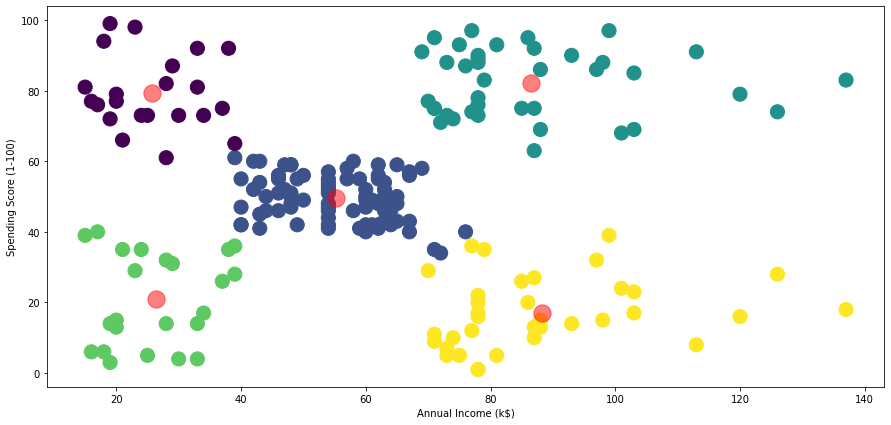

In [ ]:
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

plt.figure(1 , figsize = (15 , 7) )
plt.clf()


plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### Scatter plot - K-Means - Spending Score VS AGE
Conclusion:

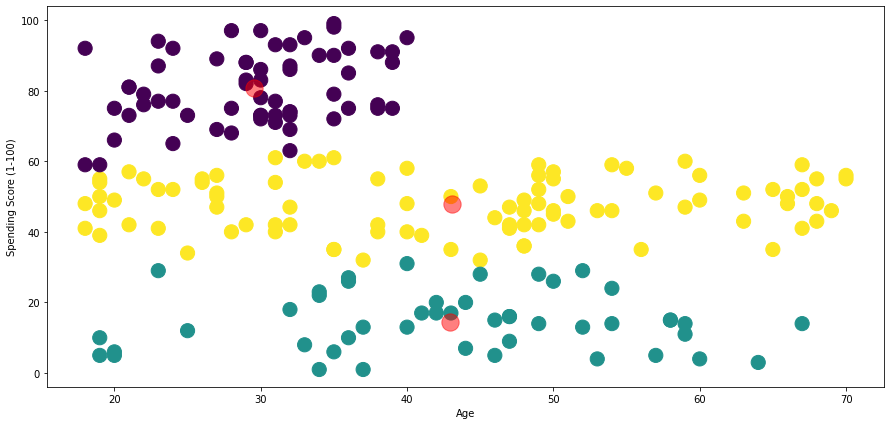

In [ ]:
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
#!pip install vpython
#scatter.scatter()
#vs.cluster_results(reduced,preds,centers)
X2 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)


labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

plt.figure(1 , figsize = (15 , 7) )
plt.clf()


plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN



### Scatter plot - DBSCAN - Spending Score VS Annual Income
Conclusion:
DBSCAN is generally less accurate than KMeans, and is very different in terms of how the algorithm operates. We found the best results with eps = 0.35, and every change upwards or downwards decreases the silhouette score.

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_transform = ['Annual Income (k$)', 'Spending Score (1-100)']
data_to_transform = df[columns_to_transform]
for i in columns_to_transform:
    # fit on training data column
    scale = StandardScaler().fit(data_to_transform[[i]])
    # transform the training data column
    data_to_transform[i] = scale.transform(data_to_transform[[i]])


0.43598431858196485


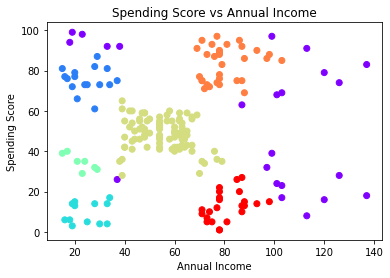

In [ ]:
# Lets do clustering with DBScan having epsilon as 0.4
income_spending_data = data_to_transform[['Annual Income (k$)', 'Spending Score (1-100)']]
dbscan = DBSCAN(eps=0.35)
identified_clusters = dbscan.fit_predict(income_spending_data)
labels = dbscan.labels_
data_with_clusters = income_spending_data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spending Score vs Annual Income")
score = silhouette_score(df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values,labels)
print(score)
silhouette_scores.append(score)


### Scatter plot - DBSCAN - Spending Score VS Age
Conclusion:
In this case we found better generalization using eps = 0.33, obviously each case will have different parameters & results since values and correlations between X and Y are different

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_transform = ['Age', 'Spending Score (1-100)']
data_to_transform = df[columns_to_transform]
for i in columns_to_transform:
    # fit on training data column
    scale = StandardScaler().fit(data_to_transform[[i]])

    # transform the training data column
    data_to_transform[i] = scale.transform(data_to_transform[[i]])

Text(0.5, 1.0, 'Spending Score vs Age')

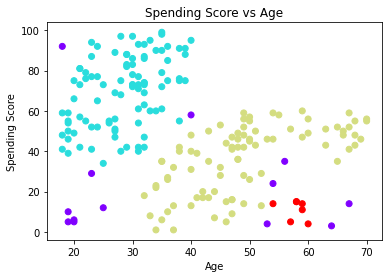

In [ ]:
# Lets do clustering with DBScan having epsilon as 0.4

dbscan = DBSCAN(eps=0.33)
identified_clusters = dbscan.fit_predict(data_to_transform)

data_with_clusters = data_to_transform.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(df['Age'], df['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending Score vs Age")

# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### Scatter plot - Hierarchical Clustering - Spending Score VS Annual Income
Conclusion:
In terms of results, Hierarchial clustering and KMeans are similar. They both worked best with 5 clusters for this example, and had pretty similar silhouette scores.


0.5529945955148897


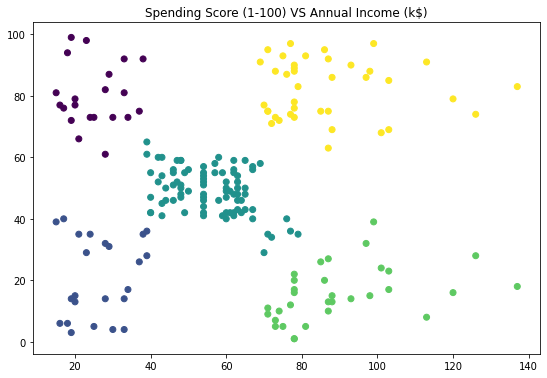

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
reduced_data = pd.DataFrame(df, columns = ['Spending Score (1-100)','Annual Income (k$)'])
cl=linkage(reduced_data,method='complete')
labels=fcluster(cl,5,criterion='maxclust')
score = silhouette_score(df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values, labels)
silhouette_scores.append(score)
print(score)
plt.subplot(7,2,1)
plt.title('Spending Score (1-100) VS Annual Income (k$)')
plt.scatter(reduced_data['Annual Income (k$)'].values.tolist(),
            reduced_data['Spending Score (1-100)'].values.tolist(),
            c=labels)
plt.gcf().set_size_inches((20, 50))
plt.show()

### Scatter plot - Hierarchical Clustering - Spending Score VS _________
Conclusion:
This case was best with 3 clusters, since data and correlations are different.


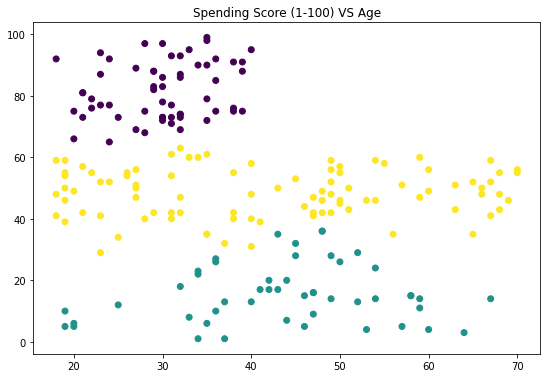

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster


reduced_data = pd.DataFrame(df, columns = ['Spending Score (1-100)','Age'])
cl=linkage(reduced_data,method='complete')
labels=fcluster(cl,3,criterion='maxclust')
plt.subplot(7,2,1)
plt.title('Spending Score (1-100) VS Age')
plt.scatter(reduced_data['Age'].values.tolist(),
            reduced_data['Spending Score (1-100)'].values.tolist(),
            c=labels)
plt.gcf().set_size_inches((20, 50))
plt.show()

### Hierarchy plot - Hierarchical Clustering - Spending Score VS Annual Income

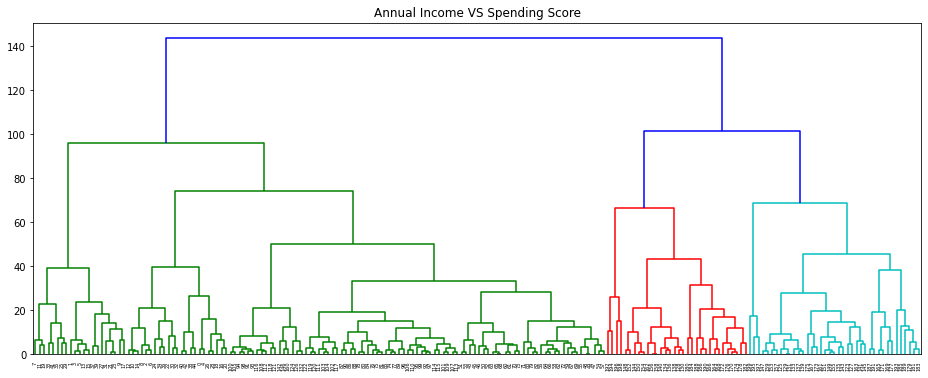

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster


reduced_data = pd.DataFrame(df, columns = ['Spending Score (1-100)','Annual Income (k$)'])
cl=linkage(reduced_data,method='complete')
plt.subplot(7,2,1)
plt.title('Annual Income VS Spending Score')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
fig.set_size_inches(35,50)
plt.show()

# Silhouette Score
**Conclusion:**
KMeans and Hierarchial clustering are very similar in terms of results and parameters, while DBSCAN was different, both in results and also in the way the algorithm works and the parameter it gets.


IN THIS TASK we kept putting Annual Income VS Spending Score, and we've seen they have good correlation, which means that a customer's annual income can help us indicate about his spending.

We also tried finding correlation betweewn Age VS Spending Score, and had less success. We can clearly see in the plots that every age has a variety of spending scores, which means that spending isn't really a factor of age, and that annual income affects it much more, as you can logically expect.

In [ ]:
algorithms = ["KMeans", "DBSCAN", "Hierarchial"]
i = 0
for i in range(0,3):
  print(algorithms[i] + " silhouette score is: " + str(silhouette_scores[i]))

print("The best clustering algorithm for this task is: " + algorithms[silhouette_scores.index(max(silhouette_scores))])
print("The silhouette score for this algorithm is: " + str(max(silhouette_scores)))

KMeans silhouette score is: 0.553931997444648
DBSCAN silhouette score is: 0.43598431858196485
Hierarchial silhouette score is: 0.5529945955148897
The best clustering algorithm for this task is: KMeans
The silhouette score for this algorithm is: 0.553931997444648
